# Avocado dataset
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold 4046 - Total number of avocados with PLU 4046 sold 4225 - Total number of avocados with PLU 4225 sold 4770 - Total number of avocados with PLU 4770 sold

# 1. importing required libraries

In [110]:
#importing analyzing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,boxcox

#importing warnings libraries to ignore warnings

import warnings 
warnings.filterwarnings('ignore')

# 2. loading the dataset

In [111]:
#let's read the dataset
avacado = pd.read_csv("avacado.csv")
avacado.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [112]:
#checking the shape of data

avacado.shape

(16468, 14)

# 3. identify the type of problem

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [113]:
#checking the data types

avacado.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

observation : according to the statment traget variable. avrageprice is float64 it means that it is continious value , that is why wer will use regression

# 4. Handling the null values  

<AxesSubplot:>

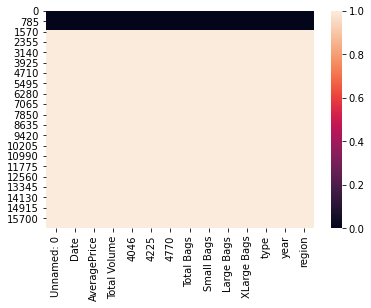

In [114]:
#looking for null values if any , in heatmap

sns.heatmap(avacado.isnull())

In [115]:
avacado.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

observation = here we can see our dataset have 14951 empty rows, so we will remove all of this 

In [116]:
# let's remove blank rows

avacado_new = avacado[avacado.notnull().any(axis=1)]
avacado_new.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [117]:
# let's check the shape of new dataset

avacado_new.shape

(1517, 14)

observation = after removing the empty rows we are getting 1517 rows

In [118]:
# removing unnmed (because that will unrealed to predicate)

avacado_new.drop('Unnamed: 0', axis = 1, inplace = True)

In [119]:
avacado_new.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [120]:
avacado_new.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


# 5. Unvariate Analysis

total number of regions are =  52


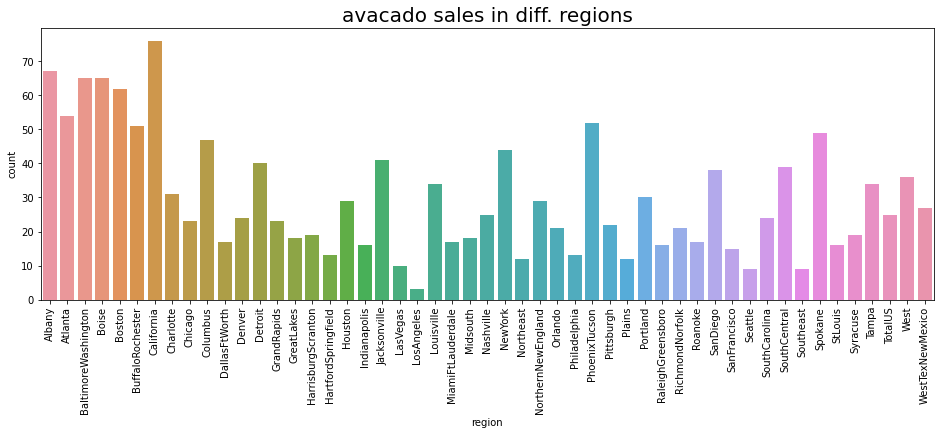

In [121]:
print("total number of regions are = ",len(avacado['region'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x = "region", data=avacado_new)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title("avacado sales in diff. regions", fontsize = 20)
plt.show()

observation = California have the max. sales and the los agles have min.

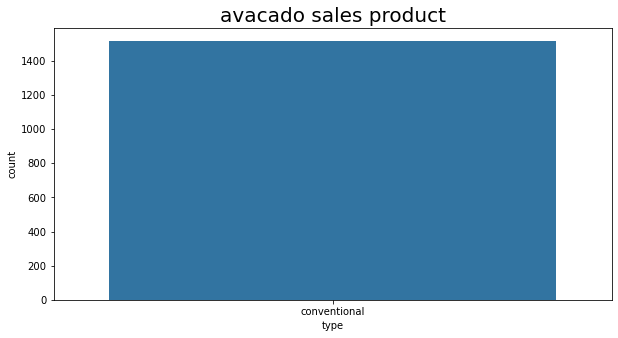

In [122]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x="type" , data=avacado_new)
plt.title("avacado sales product", fontsize = 20)
plt.show()

obseravtion = it has only 1 types of product, which is conventional

<AxesSubplot:xlabel='year', ylabel='count'>

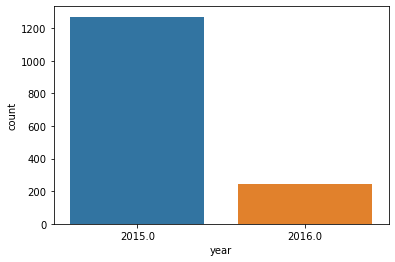

In [123]:
sns.countplot(x='year', data = avacado_new)

observation = avacado has two year data (2015, 2016)

              in 2015 sales much greater than 2016

# 6. Bivariate Analysis 

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

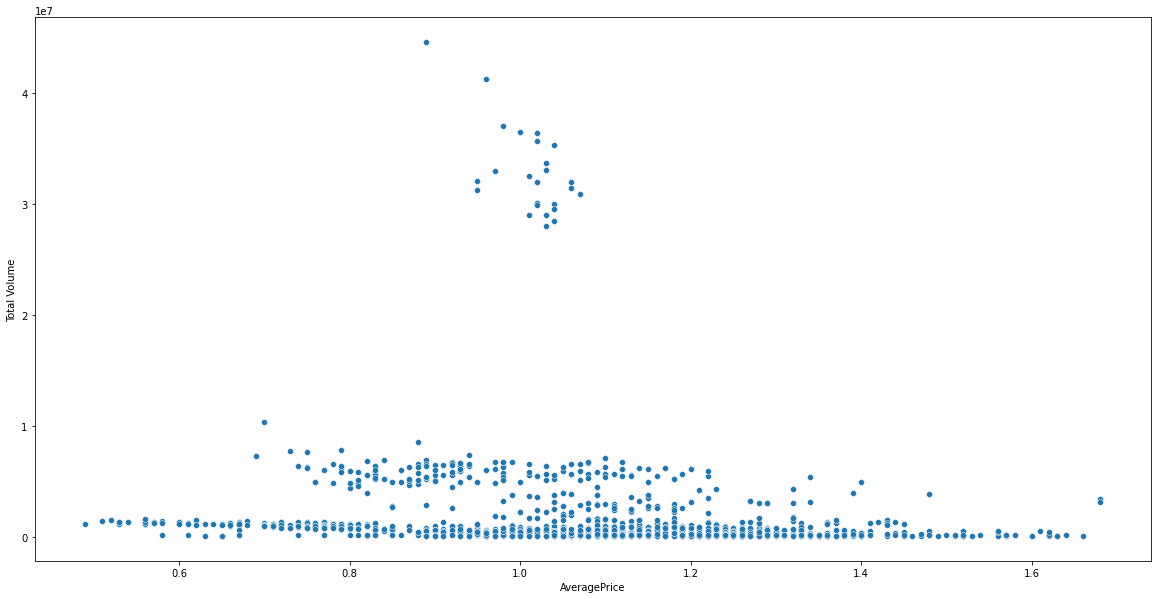

In [124]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = 'Total Volume', data = avacado_new)

 the average price per total volume is speard across the range of avrage price
    so the total volume is under the 10000000

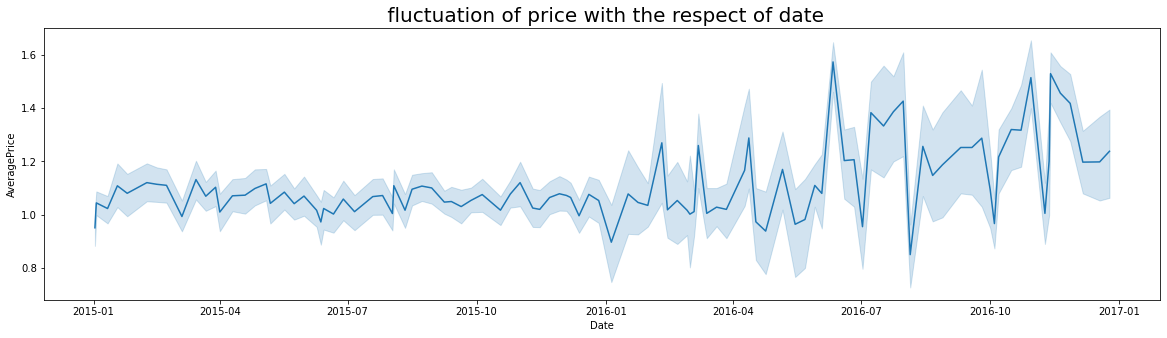

In [125]:
avacado_new['Date'] = pd.to_datetime(avacado_new['Date'], errors = 'coerce')
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="AveragePrice", data = avacado_new)
plt.title(" fluctuation of price with the respect of date", fontsize = 20)
plt.show()

observation = Average price is getting max at beggining of year

these are high spike after 2016 - 04

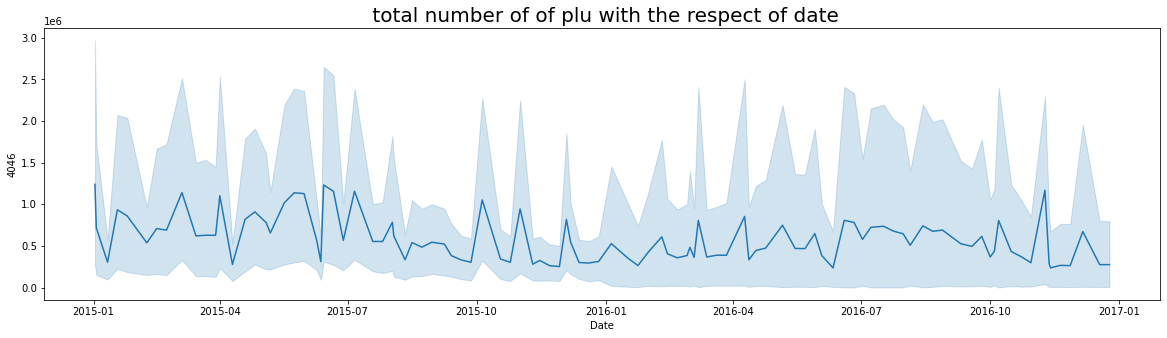

In [126]:
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="4046", data = avacado_new)
plt.title(" total number of of plu with the respect of date", fontsize = 20)
plt.show()

obeservation = PLU 4046 is dropped at the begging og the year which shows that sign of seasonality

from start to end total number of avacado sold decresed



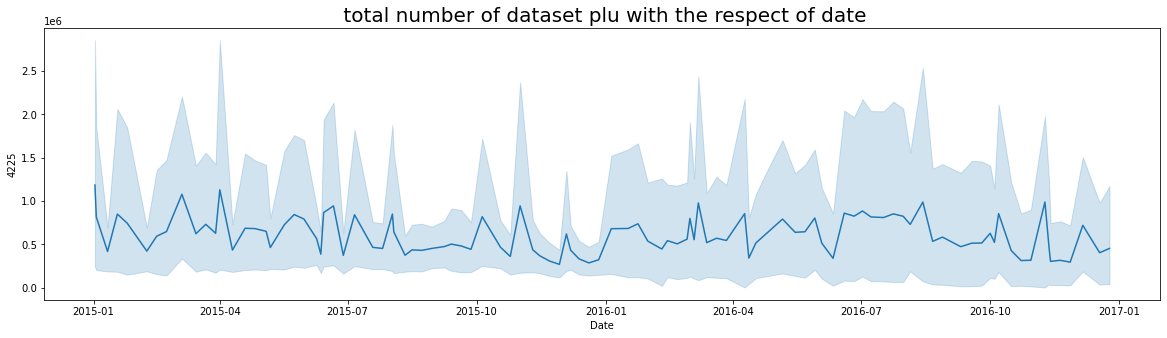

In [127]:
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="4225", data = avacado_new)
plt.title(" total number of dataset plu with the respect of date", fontsize = 20)
plt.show()

observation = PLU 4225 drops at the begging and after some it is getting its pikes, it means that it is also seasonaly

total number of avacado sold is decresed



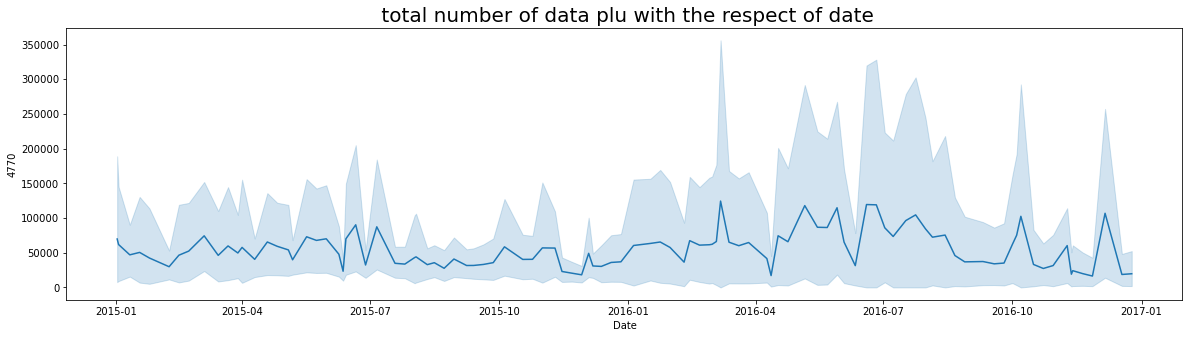

In [128]:
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="4770", data = avacado_new)
plt.title(" total number of data plu with the respect of date", fontsize = 20)
plt.show()

observation = PLU 4770 is same with condition with the beggining of the year

in 2016-04 to 2016 -07 sales has increased

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Bags'>

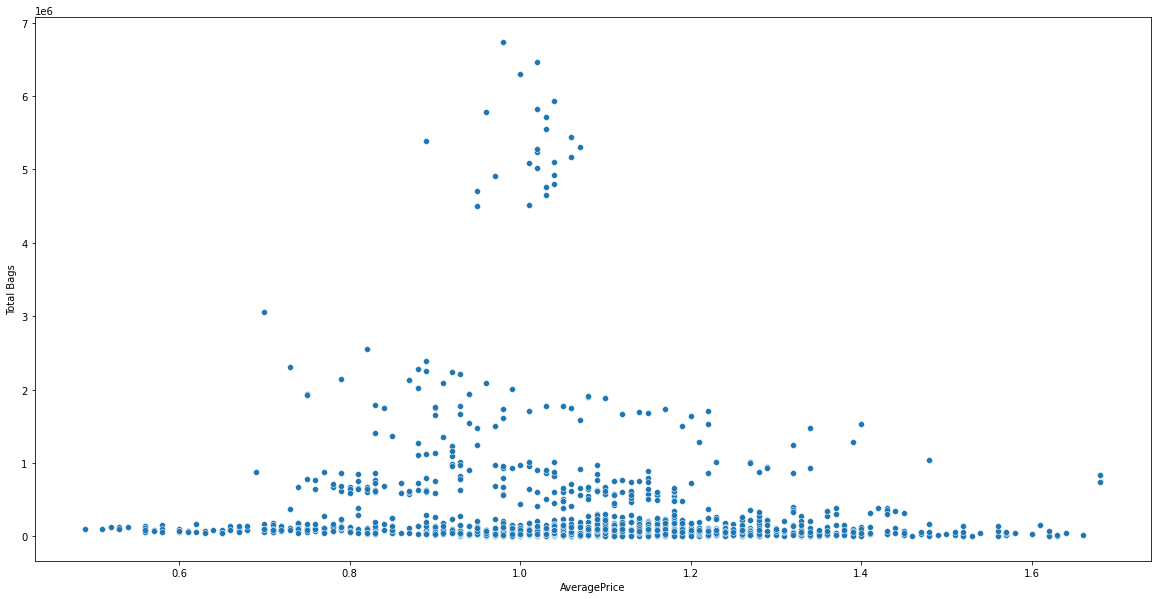

In [129]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y='Total Bags', data = avacado_new)

observation = the average price per of total bags is spread with range of average price

the majority of bags lies under 3000000

<AxesSubplot:xlabel='AveragePrice', ylabel='4046'>

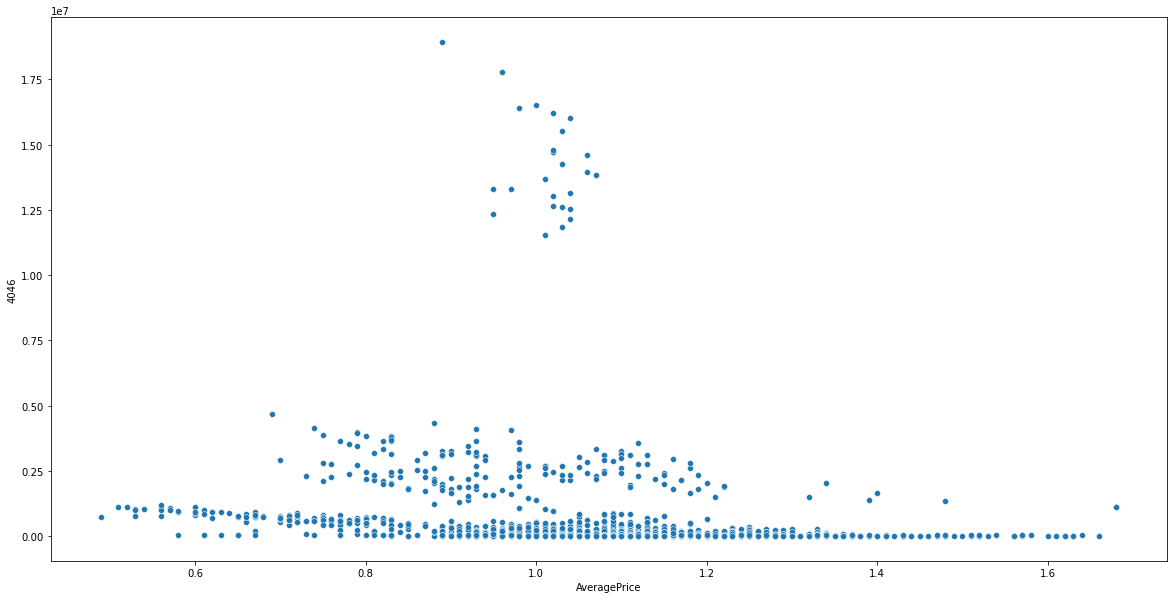

In [130]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y='4046', data = avacado_new)

obs = it is under 5000000

<AxesSubplot:xlabel='AveragePrice', ylabel='4225'>

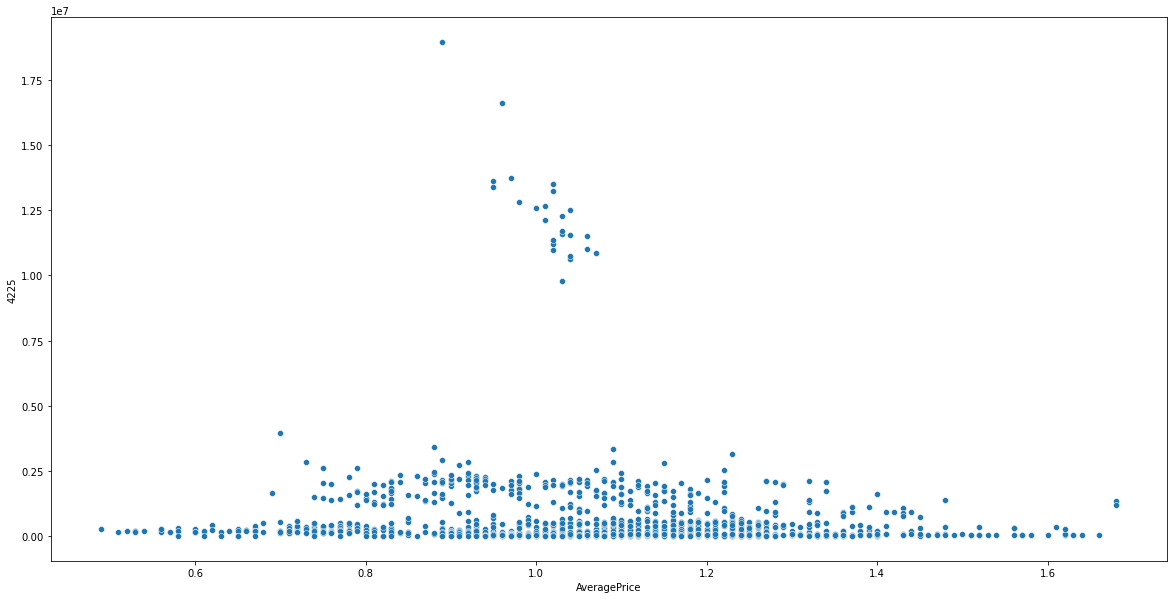

In [131]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y='4225', data = avacado_new)

obs = it is under 2500000

<AxesSubplot:xlabel='AveragePrice', ylabel='4770'>

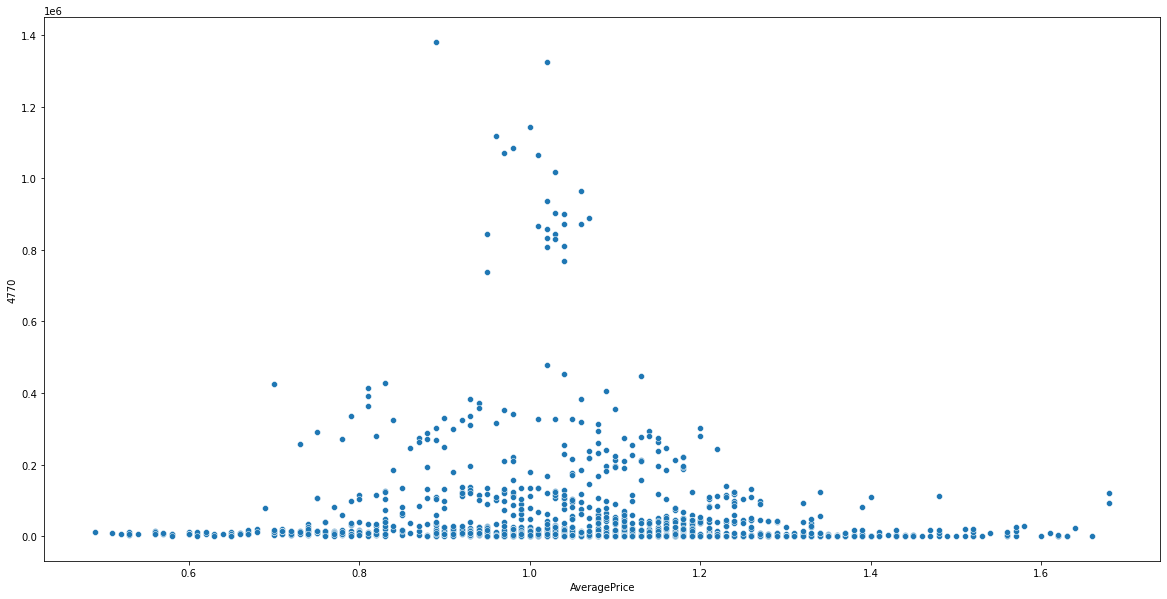

In [132]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y='4770', data = avacado_new)

it is under 400000

<AxesSubplot:xlabel='AveragePrice', ylabel='Small Bags'>

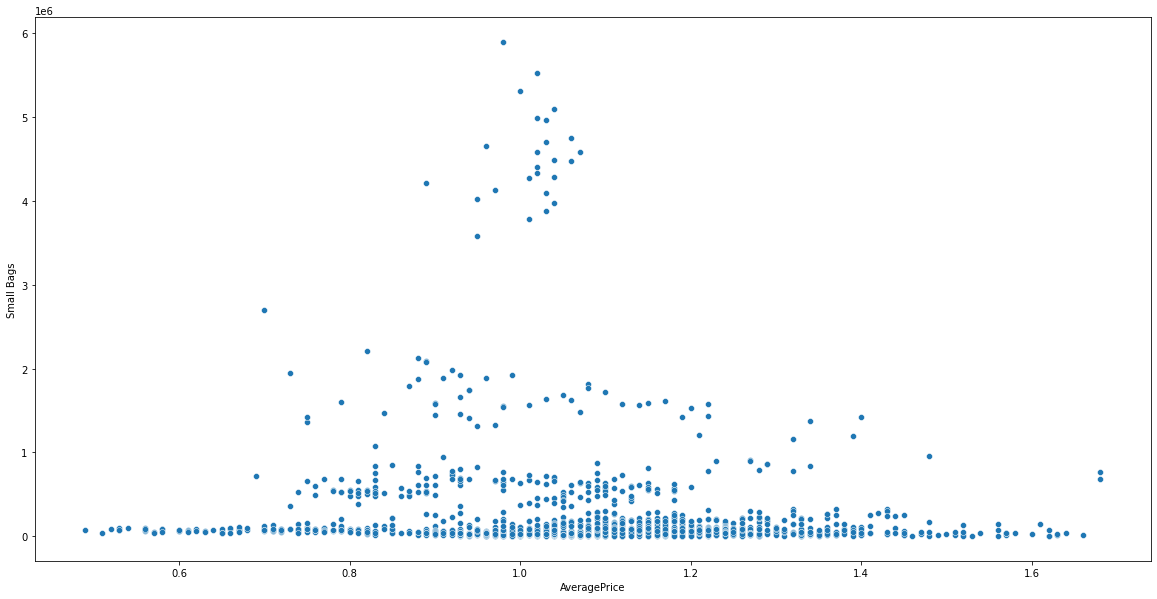

In [133]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y='Small Bags', data = avacado_new)

obs = it is under 2000000

<AxesSubplot:xlabel='AveragePrice', ylabel='XLarge Bags'>

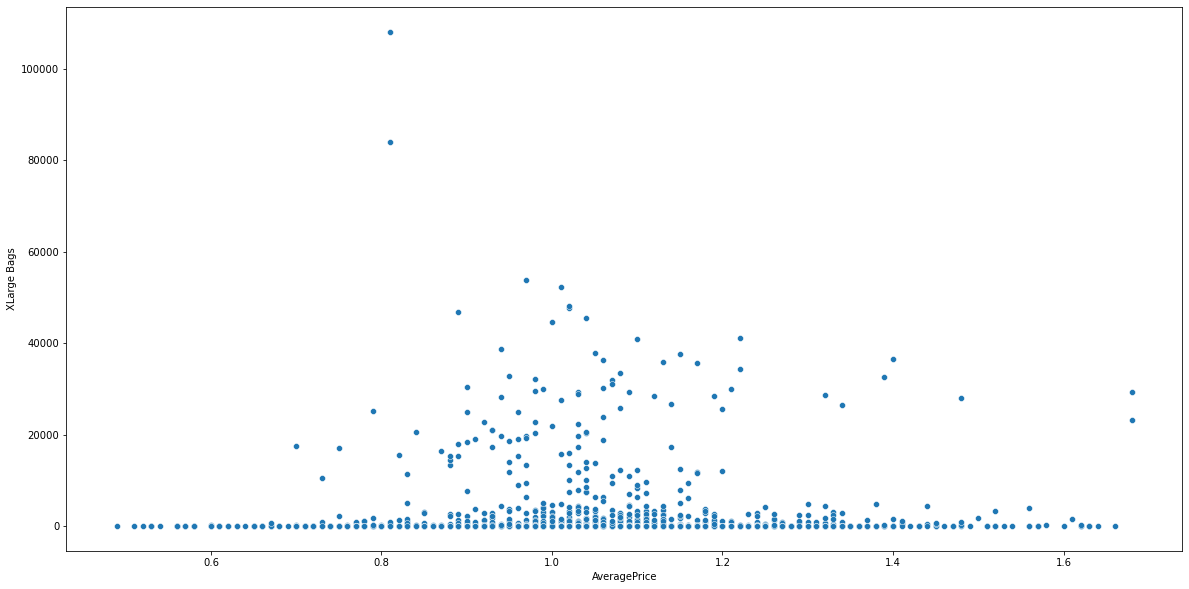

In [134]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y='XLarge Bags', data = avacado_new)

total obs. = the average all almost lies under 60000

only two values is mpre than 60000

[Text(0, 0, 'Albany'),
 Text(1, 0, 'Atlanta'),
 Text(2, 0, 'BaltimoreWashington'),
 Text(3, 0, 'Boise'),
 Text(4, 0, 'Boston'),
 Text(5, 0, 'BuffaloRochester'),
 Text(6, 0, 'California'),
 Text(7, 0, 'Charlotte'),
 Text(8, 0, 'Chicago'),
 Text(9, 0, 'Columbus'),
 Text(10, 0, 'DallasFtWorth'),
 Text(11, 0, 'Denver'),
 Text(12, 0, 'Detroit'),
 Text(13, 0, 'GrandRapids'),
 Text(14, 0, 'GreatLakes'),
 Text(15, 0, 'HarrisburgScranton'),
 Text(16, 0, 'HartfordSpringfield'),
 Text(17, 0, 'Houston'),
 Text(18, 0, 'Indianapolis'),
 Text(19, 0, 'Jacksonville'),
 Text(20, 0, 'LasVegas'),
 Text(21, 0, 'LosAngeles'),
 Text(22, 0, 'Louisville'),
 Text(23, 0, 'MiamiFtLauderdale'),
 Text(24, 0, 'Midsouth'),
 Text(25, 0, 'Nashville'),
 Text(26, 0, 'NewYork'),
 Text(27, 0, 'Northeast'),
 Text(28, 0, 'NorthernNewEngland'),
 Text(29, 0, 'Orlando'),
 Text(30, 0, 'Philadelphia'),
 Text(31, 0, 'PhoenixTucson'),
 Text(32, 0, 'Pittsburgh'),
 Text(33, 0, 'Plains'),
 Text(34, 0, 'Portland'),
 Text(35, 0, 'Raleig

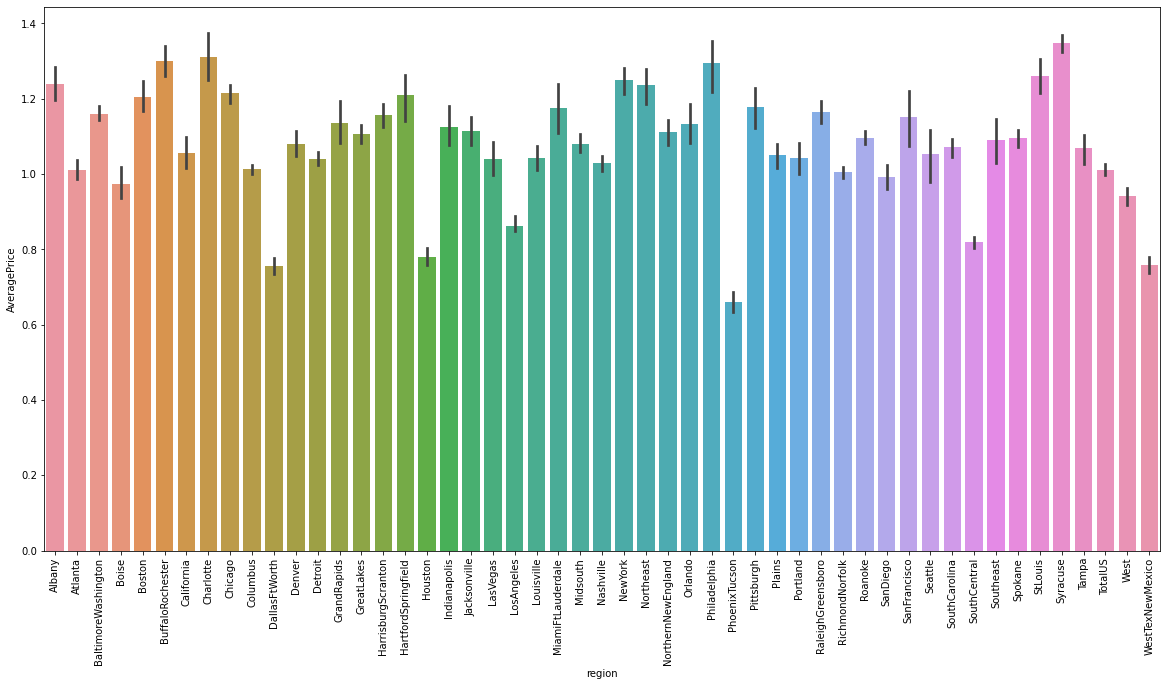

In [135]:
fig = plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'region' , y = 'AveragePrice' , data = avacado_new)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# 7. Multi-variate analysis

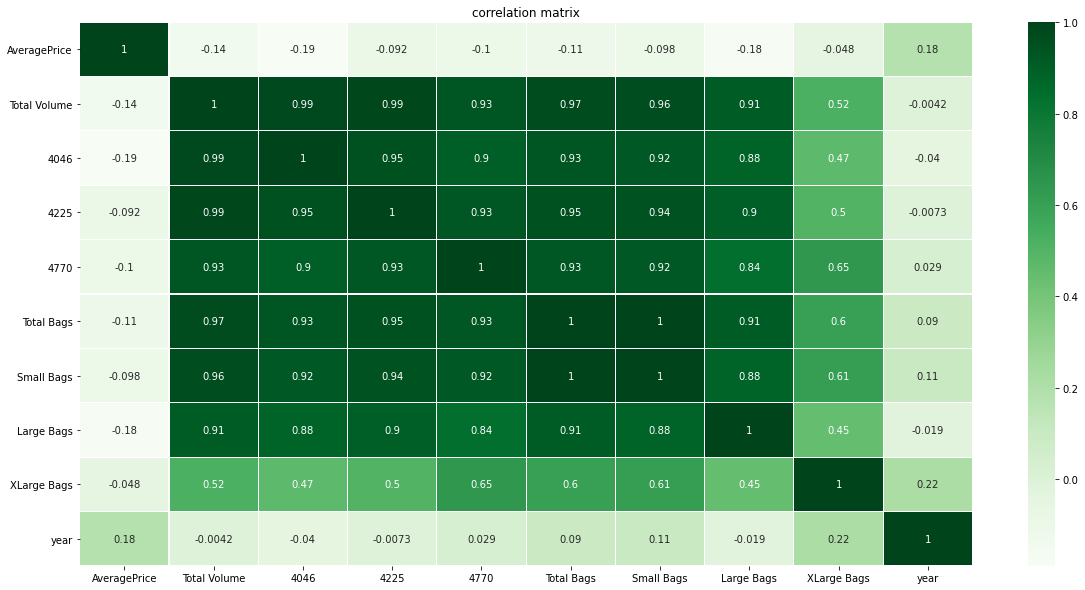

In [136]:
# multi analysis
fig = plt.figure(figsize=(20,10))
hc = avacado_new.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap='Greens',linewidths=.1,annot_kws={"size":10})
plt.title("correlation matrix")
plt.show()

observation = we are not getting so much correlation between Average price and Other columns

<AxesSubplot:title={'center':'Correlation with Age '}>

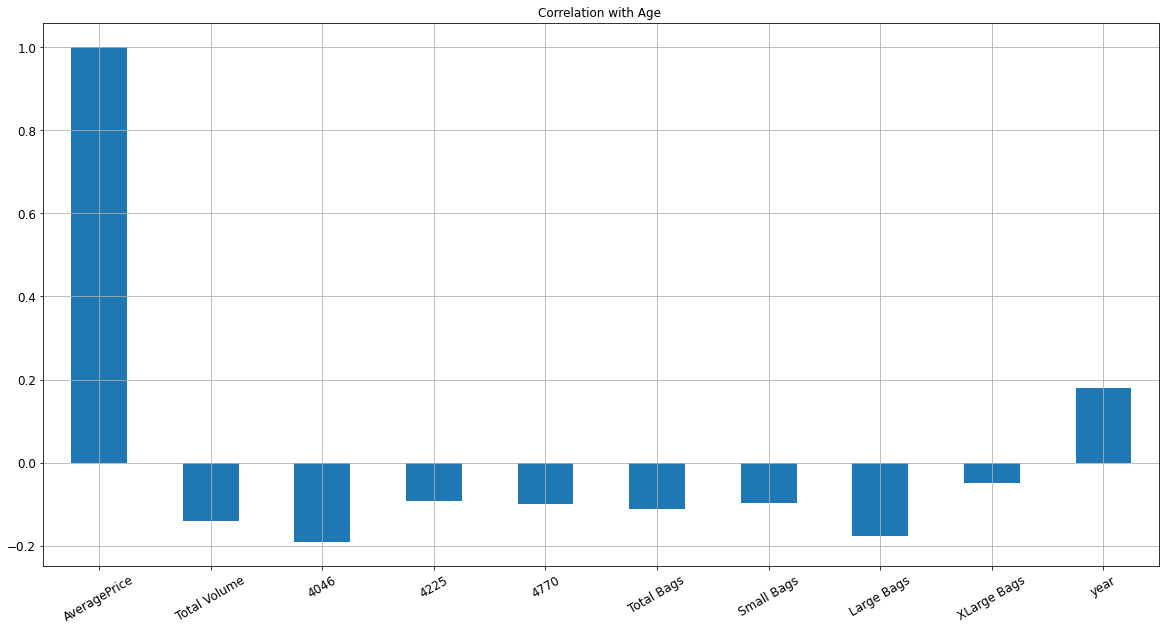

In [137]:
# Correlation with Average Price
avacado_new.corrwith(avacado_new.AveragePrice).plot.bar(
        figsize = (20,10),title = "Correlation with Age ",fontsize = 12,
        rot = 30, grid = True)

# 8. Data Cleaning 

In [138]:
# now we converting date to ordinal to ease predication

import datetime as dt
avacado_new['Date'] = pd.to_datetime(avacado_new['Date'])
avacado_new['Date'] = avacado_new['Date'].map(dt.datetime.toordinal)
avacado_new.head() #checking top 5 row

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,735959,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,735952,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,735945,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,735761,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,735931,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [139]:
avacado_new.dtypes

Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [140]:
# year is same like date- year , we can drop it

avacado_new.drop('year' , axis = 1, inplace = True)

In [141]:
avacado_new['type'].unique()

array(['conventional'], dtype=object)

In [142]:
# type only one have value across all the rows

avacado_new.drop('type',axis=1, inplace=True)

# 9. Label Coding

In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #initlize LabelEncoder

In [144]:
from sklearn.preprocessing import OrdinalEncoder
emc = OrdinalEncoder()
avacado_new['region'] = emc.fit_transform(avacado_new['region'].values.reshape(-1,1))

In [145]:
avacado_new.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,735959,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0
1,735952,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0
2,735945,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0
3,735761,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0
4,735931,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0


In [146]:
# shuffling the dataset

avacado_new = avacado_new.sample(frac=1,random_state=0)

In [147]:
avacado_new.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
1224,735840,1.03,5138256.91,2163511.05,1986059.01,124657.84,864029.01,624782.63,239195.91,50.47,49.0
580,735876,1.10,85446.43,2278.40,60221.59,606.53,22339.91,9533.88,12740.14,65.89,22.0
9,735896,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,0.0
686,735672,1.34,3135991.73,111777.91,2082038.09,5531.34,936644.39,843930.39,92714.00,0.00,27.0
685,735679,1.22,3520408.65,118765.00,2526519.62,5436.84,869687.19,782209.83,87477.36,0.00,27.0


In [148]:
avacado_new.skew()

Date            0.923615
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
region          0.288146
dtype: float64

In [149]:
avacado_new['Total Volume']=np.log(avacado_new['Total Volume'])

In [150]:
avacado_new['Total Volume'].skew()

0.6674608508123421

In [151]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for i in avacado_new.columns:
    if avacado_new[i].dtype != "object":
        if ((len(pd.unique(avacado_new[i]))) > 2):
            if abs(avacado_new.loc[:,i].skew())>0.5:
                avacado_new.loc[:,i]=pt.fit_transform(avacado_new.loc[:,i].values.reshape(-1,1))

In [152]:
avacado_new.skew()

Date            0.922547
AveragePrice   -0.109444
Total Volume    0.046358
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
region          0.288146
dtype: float64

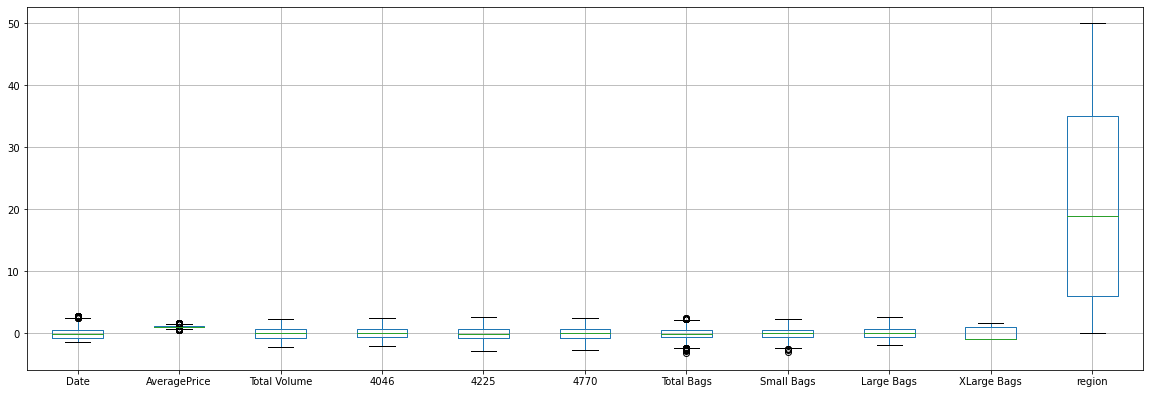

In [153]:
#checking outliers again

avacado_new.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [154]:
from scipy.stats import zscore
z=np.abs(zscore(avacado_new))
print(np.where(z>3))

(array([  47,  284,  407,  754,  754, 1237], dtype=int64), array([1, 1, 1, 6, 7, 1], dtype=int64))


In [155]:
#checking the shape of the data

df=avacado_new[(z<3).all(axis = 1)]
print(avacado_new.shape)
print(df.shape)

(1517, 11)
(1512, 11)


In [156]:
# checking the loss in percent

loss_per = (1517-1512)/1517*100
print(loss_per)

0.3295978905735003


observation = we have lost less than 1 percent data

# 10. seprate Independebt variable and Target variable

In [157]:
x = df.drop("AveragePrice", axis=1)
y = df["AveragePrice"]

# 11. Scaling

In [158]:
# getting scaling libraries

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new = sc.fit(x)
sc_x = new.transform(x)
#setting up columns after scaling

scd_x = pd.DataFrame(sc_x, index=x.index, columns=x.columns)
x=scd_x
x.head()

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
1224,0.332093,0.821594,0.769621,0.791201,0.763406,0.830497,0.815224,0.798585,0.601812,0.98
580,0.381720,0.199695,0.130248,0.425950,0.348855,0.336359,0.179125,0.500263,0.627584,0.44
9,0.409429,0.167263,0.047676,0.434095,0.244168,0.149265,0.141878,0.274490,0.000000,0.00
686,0.099669,0.770598,0.477561,0.795774,0.504602,0.838327,0.844659,0.691235,0.000000,0.54
685,0.109181,0.782954,0.483288,0.814431,0.503304,0.831134,0.837378,0.685015,0.000000,0.54


observation = After Scaling our data is in 0 to 1 range. It's now very convenient to train and test our data

# 12. best Random State

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_score:
        maxR2_Score=score
        maxRS=i
print("best accuracy is",maxr2_score,"on random_state",maxrs)                

best accuracy is 0 on random_state 199


# 13. Train Test split

In [160]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=maxRS)

# 14. Finding Best Algorithm

In [161]:
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [162]:
model = [LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [163]:
for m in model:
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,x,y,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-abs(score.mean()))

accuracy score of -> LinearRegression()
R2 Score:                 0.32842770104957797
Mean Absolute Error:      0.11940132584180305
Mean Squared error:       0.023621481052984335
Root Mean Squared Error:  0.15369281392760148
[0.30428097 0.35380197 0.27954881 0.38621436 0.3259532  0.43421738
 0.40457046 0.34167321]
cross validation score:   0.3537825456631466
Difference between R2 score and cross validatio score is -  -0.025354844613568628
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.7950110210122334
Mean Absolute Error:      0.06359735682819384
Mean Squared error:       0.007210159339207049
Root Mean Squared Error:  0.084912657120167
[0.7947278  0.81805658 0.83520823 0.86682463 0.79152343 0.79856129
 0.82025172 0.82700018]
cross validation score:   0.8190192321606521
Difference between R2 score and cross validatio score is -  -0.024008211148418668
accuracy score of -> DecisionTreeRegressor()
R2 Score:                 0.6232948754934706
Mean Absolute Error:  

observation = Random Forest Regressor has maximum accuracy and its cross validnation score is 81.90%

# 15. Hyper Parameter Tuning

In [167]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_depth': np.arange(2,20), 'max_features':['sqrt','auto','logo2'],'n_estimators':[100,200,500],'criterion' :['mse','mae']}

In [170]:
clf = RandomizedSearchCV(RandomForestRegressor(),parameters,cv=8)
clf.fit(x_train, y_train)
clf.best_params_

{'n_estimators': 500,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'mse'}

In [171]:
clf_pred = clf.best_estimator_.predict(x_test)

In [172]:
r2_score(y_test, clf_pred)

0.7665547780678075

 observation = our model learnt almost 76.65 %

# 16. Saving the model

In [173]:
import joblib
joblib.dump(clf.best_estimator_,"PJ1_Avacado.obj")
RF_from_joblib=joblib.load('PJ1_Avacado.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([0.57285757, 0.81739924, 1.13035518, 1.17238957, 1.25229531,
       1.1794226 , 1.05618121, 1.26520856, 1.07699601, 1.12674927,
       1.02605263, 1.04442214, 0.91098898, 1.3014188 , 1.1717382 ,
       1.05237719, 1.10285219, 1.06668353, 1.18430245, 1.03471874,
       0.98043427, 1.17893739, 1.11950469, 1.14304222, 1.02697267,
       1.31544646, 1.12209701, 1.16348838, 1.11773661, 1.1122037 ,
       0.89892433, 1.16863045, 1.02038485, 1.102514  , 1.09746404,
       1.03006035, 1.04075565, 1.15140707, 1.0789875 , 0.97773342,
       1.1056919 , 0.85359023, 1.2619184 , 0.75456015, 1.25079049,
       1.03124386, 1.1832794 , 1.14834162, 1.18580236, 1.19479836,
       0.99854415, 1.03066551, 0.99277056, 1.04983822, 0.98570698,
       1.07583124, 1.05599484, 1.138014  , 1.11061686, 1.01941097,
       1.13779006, 0.98466081, 0.8373816 , 1.18927778, 1.19279788,
       1.27038311, 0.66733276, 1.08014532, 1.05082639, 0.67108935,
       0.73672562, 1.15263491, 1.07607347, 0.83304473, 1.03871